## Introdução

Tendo como base o artigo [Crawling The Web: Discovery And Maintenance Of Large-Scale Web Data](https://oak.cs.ucla.edu/~cho/papers/cho-thesis.pdf), de Junghoo Cho, alguns dos estimadores de frequência de mudanças de documentos foram testados. Diversos deles são apresentados na seção 6, no entanto, apenas alguns foram possíveis de serem experimentados e eles têm em comum utilizarem o processo de Poisson para modelar as mudanças de documentos/sites na Web. 

## Imports básicos e código para gerar gráficos

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from functions import Simulator

simulator = Simulator()

def plot_compare(hists, results, main_title, nrows, ncols, figx=20, figy=30):
    fig, axs = plt.subplots(nrows, ncols, figsize=(figx,figy))
    
    for ax, hist, data in zip(axs, hists, results):
        title, days, freq = hist
       
        name, content = data
        
        xs = list()
        
        y1s = list()
        y2s = list()
        
        z1s = list()
        z2s = list()
        
        for values in content:
            xs.append(values[0])
            y1s.append(values[1])
            y2s.append(values[2])
            z1s.append(values[3])
            z2s.append(values[4])
        
        ax[0].bar(days, freq)
        ax[0].set(xlabel='#dias após 31/10/2019', ylabel='# de visitas com alterações', title=f'{name}: registro de alterações')
        
        ax[1].plot(xs, y1s, '--r', label='r = X / n')
        ax[1].plot(xs, y2s, '--k', label='r = -log((n - X + .5) / (n + .5)')
        ax[1].legend()
        ax[1].set(xlabel='# dias de revisitas para gerar a estimativa', ylabel='% de visitas com alterações', title=f'{name}: comparação de % de visitas com alterações')

        ax[2].plot(xs, z1s, '--r', label='r = X / n')
        ax[2].plot(xs, z2s, '--k', label='r = -log((n - X + .5) / (n + .5)')
        ax[2].legend()
        ax[2].set(xlabel='# dias de revisitas para gerar a estimativa', ylabel='Tempo previsto de revisita (em horas)', title=f'{name}: comparação de tempo previsto por estimador')
        
    fig.suptitle(main_title)
    fig.subplots_adjust(hspace=0.4)
    fig.subplots_adjust(wspace=0.2)
    
    plt.show()

### Experimentos

Para os experimentos, uma coleta entre os dias 31/10/2019 e 30/04/2020 foi feita no site [Internet Archive: Wayback Machine](https://archive.org/web/). Esse site possui o histórico de mudanças de sites ao longo de vários anos. Alguns deles com um histórico mais completo, outros nem tanto. Por questão de simplicidade, espaço de memória e tempo para coleta, apenas os últimos 6 meses de alguns sites foram coletados. Além disso, **apenas mudanças na página principal foi considerada (index.html)**.

Os sites selecionados formam grupos de: Educação, notícias e governamentais. Isso pois é esperado que haja intervalo distinto de atualizações de páginas para esses diferentes domínios, podendo então verificar melhor diferentes estimadores.

#### Estimadores

Para realizar a previsão de mudanças em sites é utilizado as seguintes formulações:
- $I$: É o intervalo de tempo que acessamos um site
    - Pode ser regular ou não
- $f = 1 / I$: É a frequência que visitamos um site
- $\lambda$: É o parâmetro $\lambda$ de um processo de Poisson que representa a frequência de mudança numa página/site
    - **É o que desejamos estimar**
- $r = \frac{\lambda}{f}$ é a razão de frequência de mudanças para a frequência de acesso
    - Se $r$ > 1, o site/documento muda mais rápido que é revisitado
    - Se $r$ = 1, então acessamos o site/documento na mesma frequência que ele é alterado
    - Se $r$ < 1, o site/documento é revisitado mais vezes de que é alterado

Como $r = \frac{\lambda}{f}$ podemos estimar $\lambda$, a frequência de mudanças, a partir de $r$ (multiplicando $r$ por $f$. Para o caso de **acesso regular**, isto é, quando **$I$** é fixo, temos dois principais estimadores para $r$:  
- $r$ = $\frac{X}{n}$ (apresentado na seção 6.4.1 do artigo)
    - X é o número de mudanças detectadas
    - n é o número de acesso ao site/documento
- $r$ = $-log(\frac{n - X + 0.5}{n + 0.5})$ (apresentado na seção 6.4.2 do artigo)
    - X é o número de mudanças detectadas
    - n é o número de acesso ao site/documento
    
O primeiro estimador seria desejado quando se tem um completo histórico de mudanças, enquanto que o segundo quando essa informação é incompleta.

#### Comparação de estimadores para acessos regulares de 24H

Os testes foram feitos considerando os dois estimadores citados anteriormente e considerando o intervalo regular de 24h entre um acesso e outro para estimar a frequência ($\lambda$) em horas que diferentes sites mudam sua página principal. 

Nas figuras a seguir:
- A $1^{a}$ coluna representa o número de mudanças na página principal por dia após a data 31/10/2019
- A $2^{a}$ coluna mostra a relação para os dois estimadores citados anteriormente. 
    - No eixo horizontal está o número de dias usados para estimar a frequência de atualização dos sites
    - No eixo vertical há a porcentagem de vezes que houve mudanças ao acessar o site seguindo o que foi inferido por cada estimador, de acordo com o número de revisitas     
- A $3^{a}$ coluna representa o tempo estimado de mudanças para os sites de acordo com cada estimador (eixo vertical) pelo número de dias usados para gerar a estimativa (eixo horizontal)

**Observações:**

- Caso o número de visitas seja insuficiente para fazer uma estimativa, o eixo vertical da $2^{a}$ e $3^{a}$ 
coluna terá valor 0 para aquele número de visitas.

## Teste de estimadores para sites selecionados

### Sites de instituições de ensino selecionadas

In [128]:
f_usp  = simulator.calculate_changes_by_offset('usp')
f_ufmg = simulator.calculate_changes_by_offset('ufmg')
f_ufrj = simulator.calculate_changes_by_offset('ufrj')
f_unb  = simulator.calculate_changes_by_offset('unb')
f_ufpe = simulator.calculate_changes_by_offset('ufpe')
f_ufsc = simulator.calculate_changes_by_offset('ufsc')

days = 60
offset = 24

usp  = simulator.run_experiment('usp', days, offset)
ufmg = simulator.run_experiment('ufmg', days, offset)
ufrj = simulator.run_experiment('ufrj', days, offset)
unb  = simulator.run_experiment('unb', days, offset)
ufpe = simulator.run_experiment('ufpe', days, offset)
ufsc = simulator.run_experiment('ufsc', days, offset)

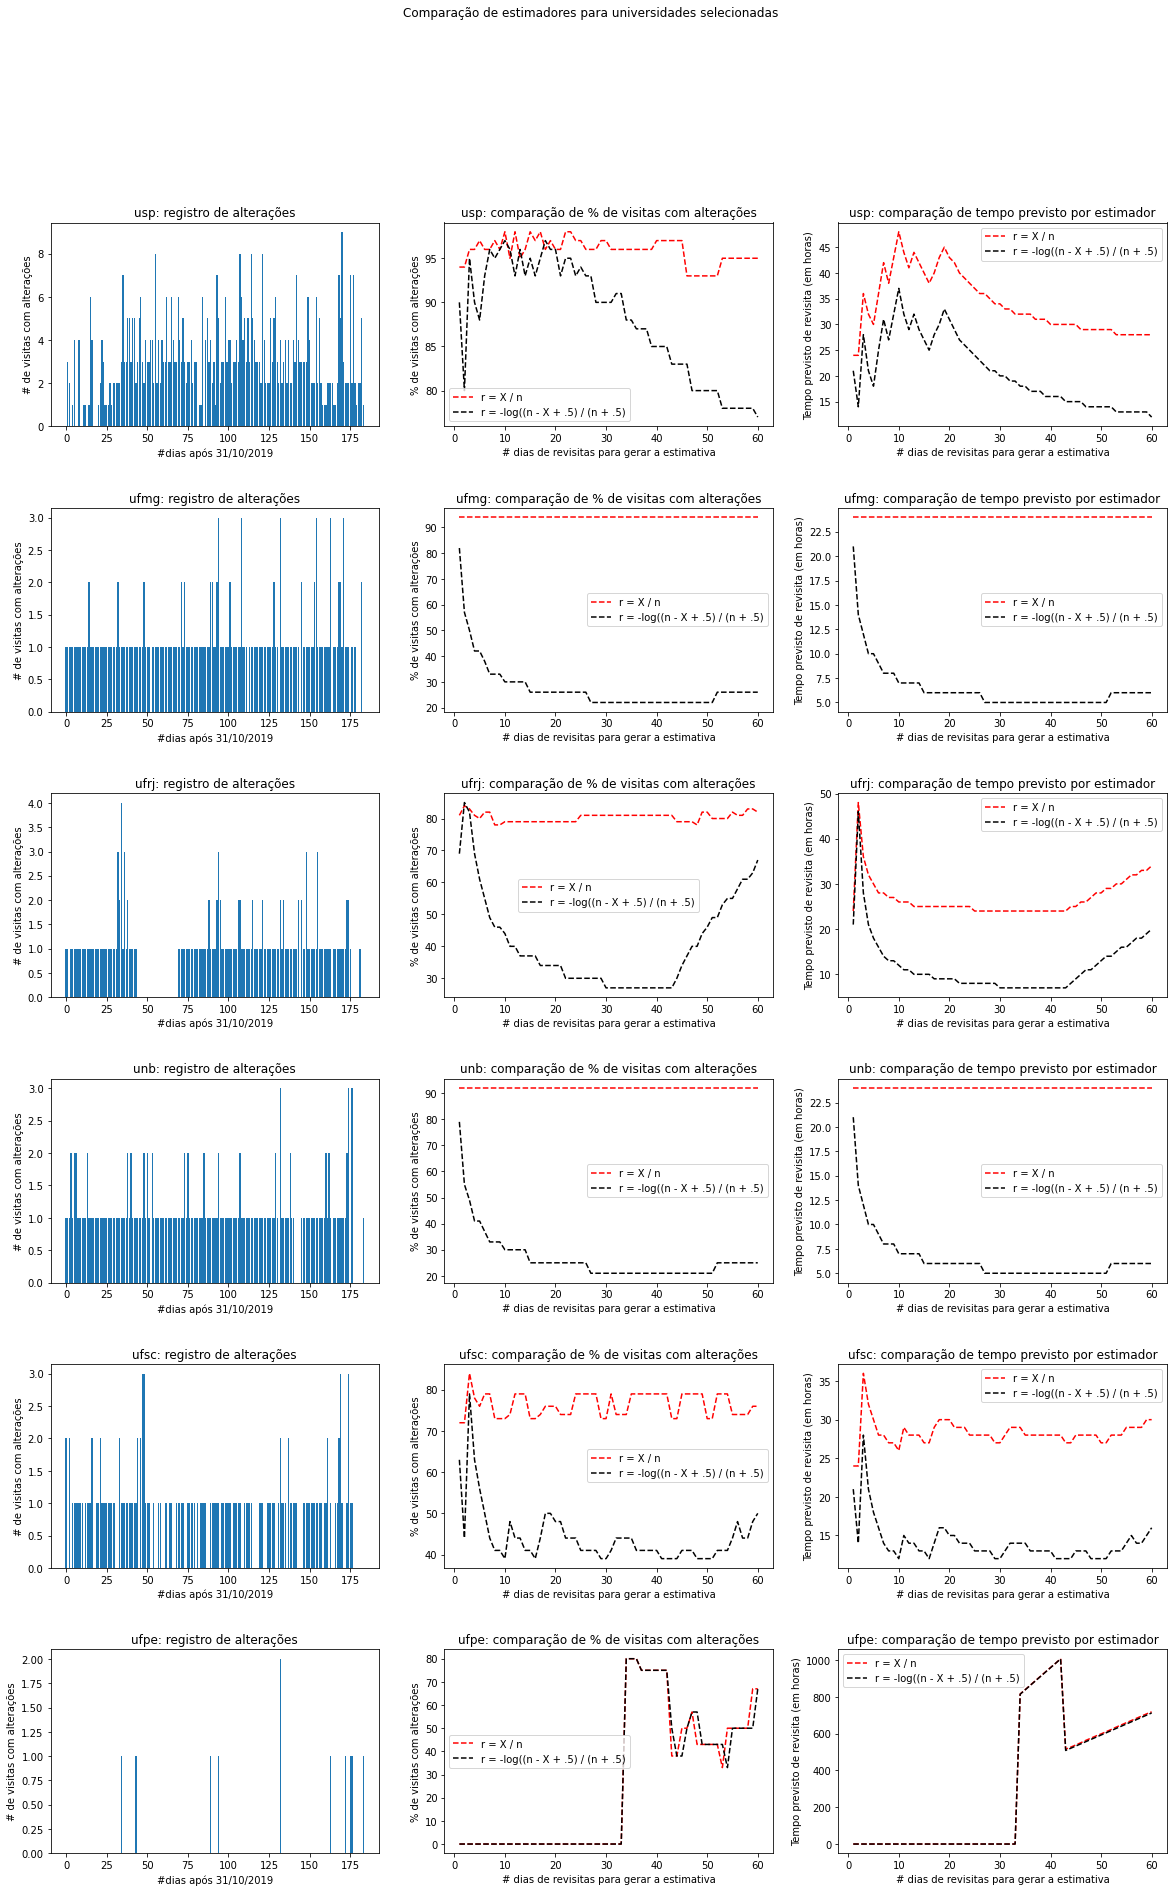

In [129]:
hists = [f_usp, f_ufmg, f_ufrj, f_unb, f_ufsc, f_ufpe]
data = [('usp',usp),('ufmg', ufmg), ('ufrj',ufrj),('unb',unb),('ufsc',ufsc),('ufpe', ufpe)]

plot_compare(hists, data, 'Comparação de estimadores para universidades selecionadas', 6, 3)

### Sites de notícias selecionados

In [130]:
f_g1 = simulator.calculate_changes_by_offset('g1')
f_elpais = simulator.calculate_changes_by_offset('elpais')
f_folha = simulator.calculate_changes_by_offset('folha')
f_metropoles = simulator.calculate_changes_by_offset('metropoles')
f_r7 = simulator.calculate_changes_by_offset('noticias_r7')
f_uol = simulator.calculate_changes_by_offset('noticias_uol')

days = 60
offset = 24

g1  = simulator.run_experiment('g1', days, offset)
elpais = simulator.run_experiment('elpais', days, offset)
folha = simulator.run_experiment('folha', days, offset)
metropoles  = simulator.run_experiment('metropoles', days, offset)
r7 = simulator.run_experiment('noticias_r7', days, offset)
uol = simulator.run_experiment('noticias_uol', days, offset)

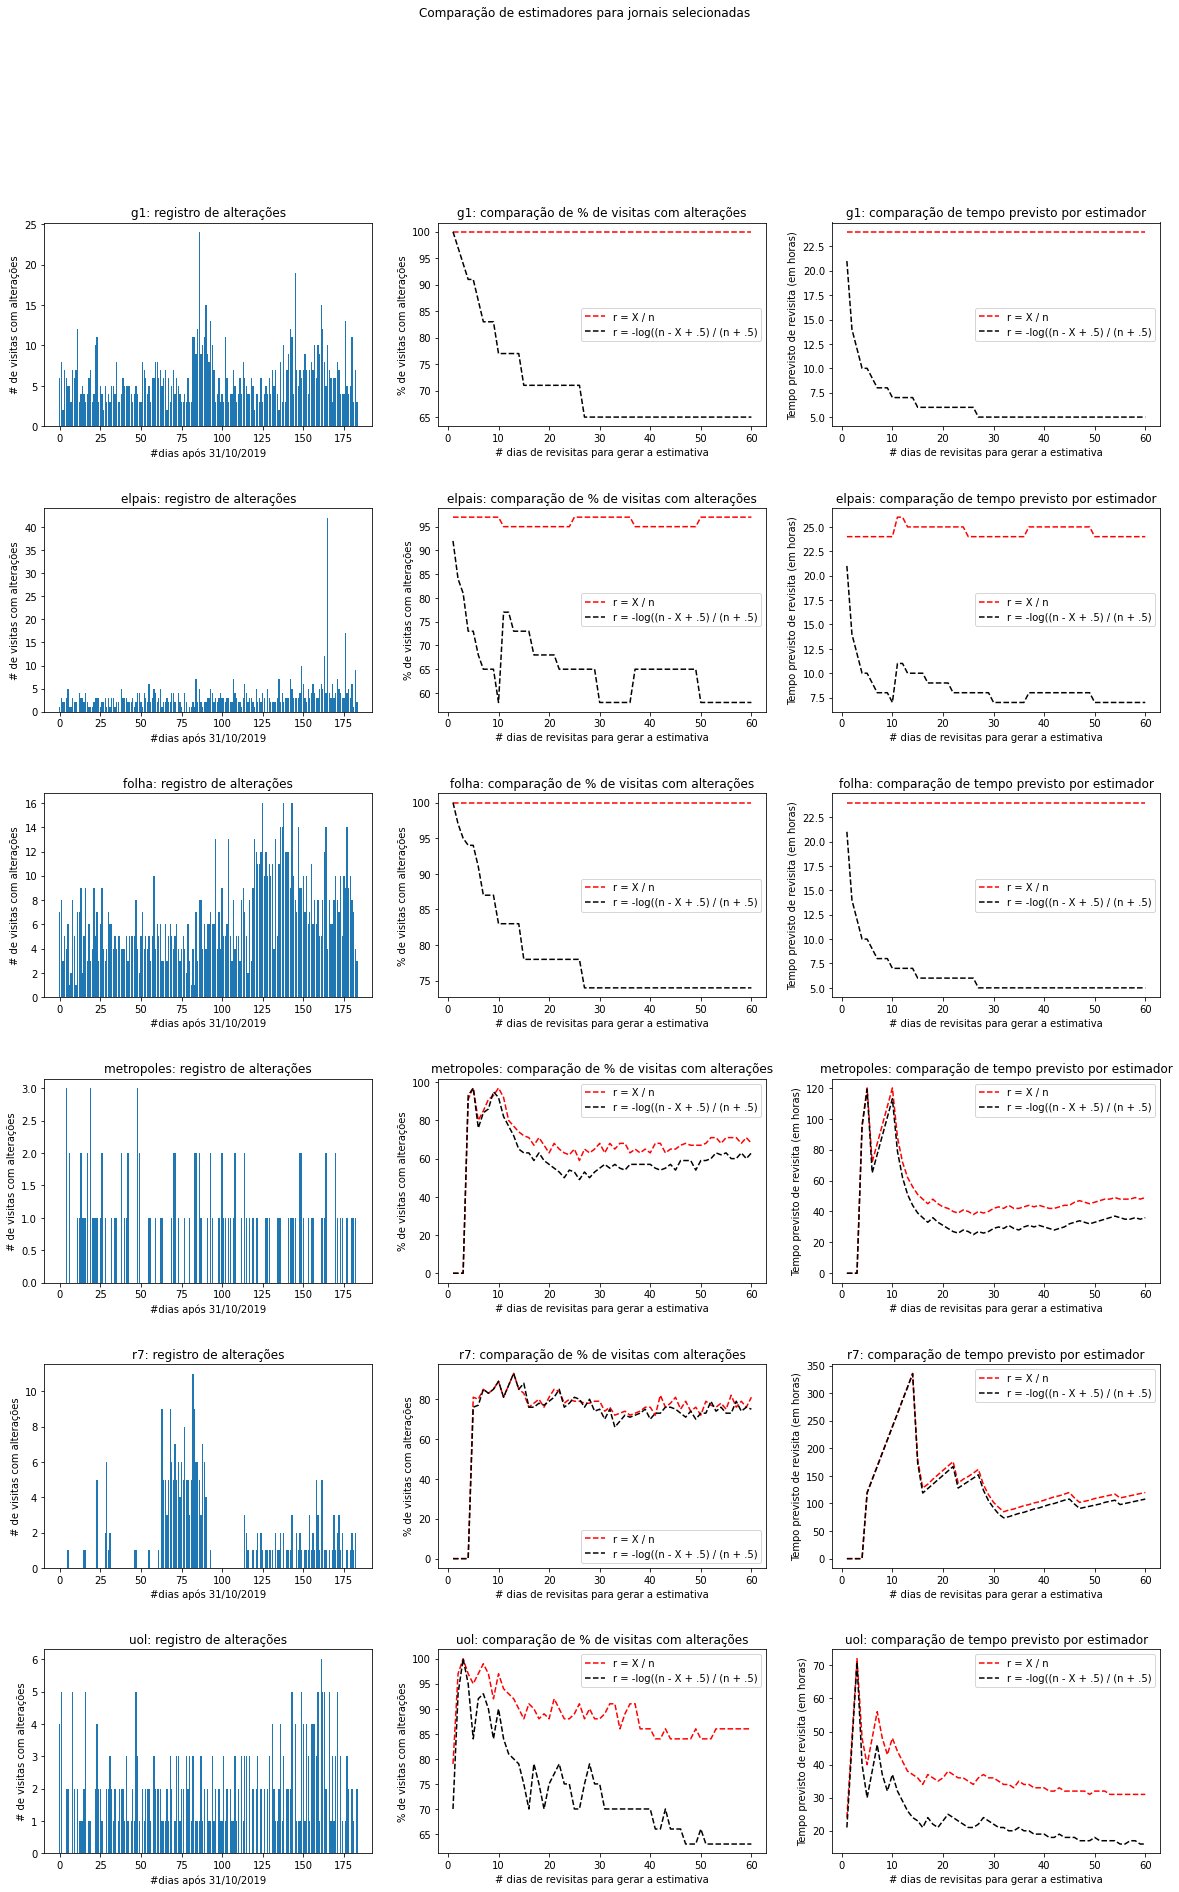

In [131]:
hists = [f_g1, f_elpais, f_folha, f_metropoles, f_r7, f_uol]
data = [('g1',g1),('elpais', elpais), ('folha',folha),('metropoles',metropoles),('r7',r7),('uol', uol)]

plot_compare(hists, data, 'Comparação de estimadores para jornais selecionadas', 6, 3)

### Sites governamentais selecionados

In [132]:
f_sp_state = simulator.calculate_changes_by_offset('saopaulo_estado')
f_rj_state = simulator.calculate_changes_by_offset('rj_estado')
f_mg       = simulator.calculate_changes_by_offset('mg')
f_es       = simulator.calculate_changes_by_offset('es')
f_sp_city  = simulator.calculate_changes_by_offset('sp_cidade')
f_rj_city  = simulator.calculate_changes_by_offset('rio_cidade')
f_pbh      = simulator.calculate_changes_by_offset('pbh')
f_vitoria  = simulator.calculate_changes_by_offset('vitoria')

days = 60
offset = 24

sp_state = simulator.run_experiment('saopaulo_estado', days, offset)
rj_state = simulator.run_experiment('rj_estado', days, offset)
mg       = simulator.run_experiment('mg', days, offset)
es       = simulator.run_experiment('es', days, offset)
sp_city  = simulator.run_experiment('sp_cidade', days, offset)
rj_city  = simulator.run_experiment('rio_cidade', days, offset)
pbh      = simulator.run_experiment('pbh', days, offset)
vitoria  = simulator.run_experiment('vitoria', days, offset)

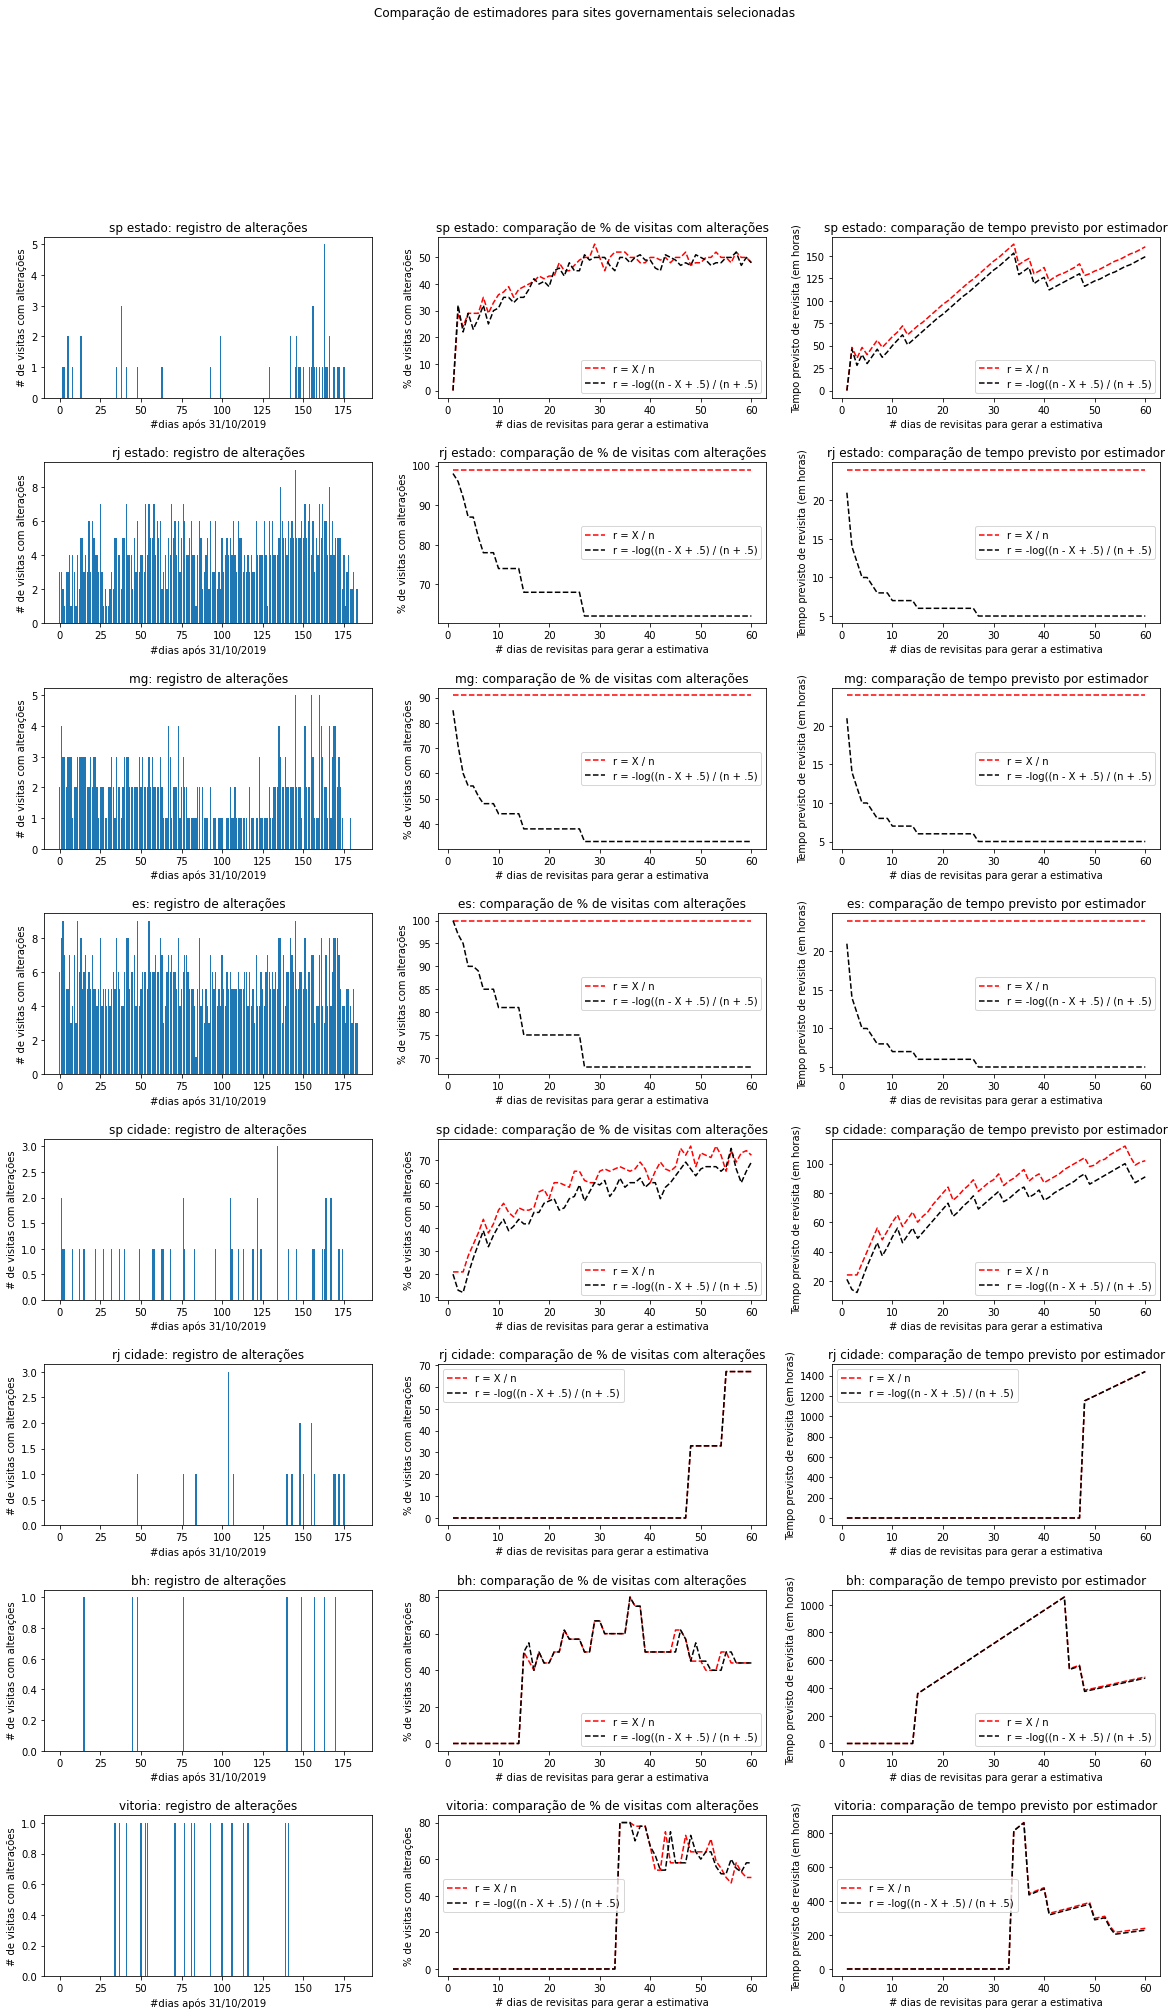

In [133]:
hists = [f_sp_state, f_rj_state, f_mg, f_es, f_sp_city, f_rj_city, f_pbh, f_vitoria]
data = [('sp estado',sp_state),('rj estado', rj_state), ('mg',mg),('es', es),('sp cidade',sp_city),('rj cidade', rj_city), ('bh', pbh), ('vitoria', vitoria)]

plot_compare(hists, data, 'Comparação de estimadores para sites governamentais selecionadas', 8, 3, figy=32)

### Desempenho médio dos estimadores por número de revisitas

O código abaixo serve para calcular o desempenho médio dos dois estimadores para os experimentos feitos anteriormente ao aumentar o número de revisitas.

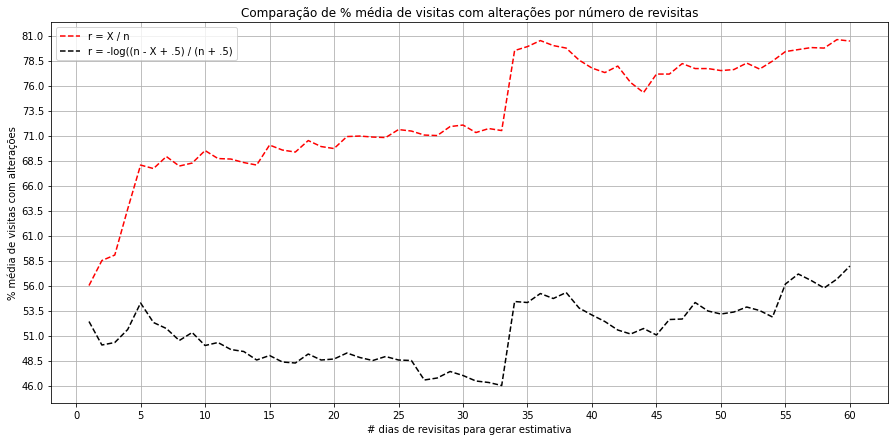

In [135]:
results = [g1, elpais, folha, metropoles,r7, uol, 
           usp, ufmg, ufrj, unb, ufpe, ufsc,
           sp_state, rj_state, mg, es, sp_city, rj_city, pbh, vitoria]

xys_1 = dict([(x, list()) for x in range(1, 61)])
xys_2 = dict([(x, list()) for x in range(1, 61)])

for result in results:
    for item in result:
        xys_1[item[0]].append(item[1])  
        xys_2[item[0]].append(item[2])  

ys_1 = list() 
xs = list()
for day in xys_1:
    size = len(xys_1[day]) 
    
    xs.append(day)
    ys_1.append(sum(xys_1[day]) / size)
    
ys_2 = list()
for day in xys_2:
    size = len(xys_2[day]) 
    
    ys_2.append(sum(xys_2[day]) / size) 

fig, ax = plt.subplots(figsize=(15,7))

xticks = np.arange(0, 61, 5.0) 
yticks = np.arange(min(ys_2), max(ys_1) + 1, 2.5)

ax.plot(xs, ys_1, '--r', label='r = X / n')
ax.plot(xs, ys_2, '--k', label='r = -log((n - X + .5) / (n + .5)')
ax.set(xlabel='# dias de revisitas para gerar estimativa', ylabel='% média de visitas com alterações', xticks=xticks, yticks=yticks, title='Comparação de % média de visitas com alterações por número de revisitas')
ax.grid()
ax.legend()

plt.show()

O gráfico acima mostra que o estimador $r = \frac{X}{n}$ apresenta resultado médio superior ao $r = -log(\frac{n - X + .5}{n + .5})$ para qualquer número de revisitas, bem como com poucos dias ele já é capaz de estimar com relativo bom desempenho a frequência de mudanças dos sites selecionados. Por exemplo, com 5 dias utilizados para fazer revisitas, em média, a estimativa gerada resulta em quase 68% de visitas com mudanças. Enquanto que $r = -log(\frac{n - X + .5}{n + .5})$ tem um desempenho por volta de 54%. 

O estimador $r = \frac{X}{n}$ também tende a melhorar a medida que o número de revisitas para fazer as estimativas aumentam. Já o outro estimador, possui momentos que seu desempenho diminui.

### Discussão dos resultados

Os gráficos acima mostram que, para os dados usados, o estimador mais simples, $r = \frac{X}{n}$, obtêm, de maneira geral, o melhor resultado. Isso ocorre pela razão de que o segundo estimador, $r = -log(\frac{n - X + .5}{n + .5})$, tende a prever tempos de revisitas em intervalos de tempo mais baixo. Por sua vez, o estimador $r = \frac{X}{n}$, em geral, estima tempos de revisitas em intervalos maiores. Isso explica seu desempenho superior, uma vez que as chances de um documento ter mudado aumentam quando é visitado mais tardiamente. 

O estimador $r = -log(\frac{n - X + .5}{n + .5})$ tende a predizer intervalos de tempos maiores e, consequentemente, obter melhores resultados quando as visitas feitas para realizar a estimativa obtêm muitas visitas sem mudanças. Esse seria o caso onde as mudanças de documentos/sites é mais esparso, isto é, com poucas mudanças. Porém, os datasets usados nesse experimento não contam com essa característica, exceto para alguns casos, como: Prefeitura de Belo Horizonte, Rio de Janeiro (Capital) e UFPE. Nesse casos, há resultados um pouco melhores para esse estimador em relação ao $r = \frac{X}{n}$ em alguns pontos, quando os resultados não são similares. É possível que um dataset com dados de histórico de mudanças mais esparsas poderia deixar isso mais evidente.     

Os gráficos também mostram que é possível realizar estimativas com relativo bom desempenho mesmo com poucas revisitas. 

## Estimadores de acessos irregulares

Os estimadores acima têm em comum precisarem de visitas regulares aos documentos para estimar sua frequência de mudança. Outra categoria de estimadores relaxam essa restrição, como o estimador abaixo (apresentado na seção 6.4.3 do artigo):

$$\sum_{i=1}^{m} \frac{t_{ci}}{e^{\lambda t_{ci}} - 1} = \sum_{j=1}^{n - m} t_{uj}$$

Onde $t_{ci}$ representa o intervalo onde a i-ésima mudança é detectada, enquanto $t_{uj}$ representa o j-ésimo intervalo que não detectamos mudanças.

A equação acima faz uso da máxima verossimilhança para encontrar o melhor valor de $\lambda$. O problema é que resolver a equação é difícil, inviável computacionalmente. 

O que se espera é que, na medida que temos um maior histórico para estimar a frequência de mudanças de um determinado documento, o valor estimado seja o mais próximo possível do real. No entanto, a equação acima se torna especialmente complexa, dificultando/impossibilitando sua solução.

Outro grande problema é a exponencial no denominador da primeira igualdade na equação. Os algoritmos usados para resolvê-la computacionalmente recebem overflow ao serem executados, tornando inviável sua utilização.

A equação é difícil ser normalizada (para remover overflow) pois como a exponencial está no denominador, técnicas como normalização via logarítmo natural não se mostraram úteis. Além disso, a tentativa de diminuir suas variáveis de entrada dividindo-as, por exemplo, por 100, 1000, 10000, são igualmente pouco úteis. A razão disso é que o valor de $\lambda$ tende a aumentar proporcionalmente nas iterações dos algorítmos de solução de equações, recebendo overflow.

A conclusão que se chega é que, embora a equação seja simples de ser experimentada (bastando, basicamente, calcular as visitas cujos intervalos tiveram mudança ou não), da forma como está, ela é inviável computacionalmente de ser utilizada.

# Testes de estimadores para sites de coletas emergenciais

De maneira geral, o conteúdo de interesse dos sites das coletas emergenciais se encontram em seções específicas onde o histórico disponível no Wayback Machine é excasso ou nulo (por exemplo, `prefeitura-x/licitacoes`), impossibilitando teste de estimadores. Assim, para os testes abaixo foi considerado qualquer mudança em qualquer página do domínio e apenas aqueles sites cujo histórico de mudanças são maiores que seis registros.  

In [17]:
# Código para recuperar os diferentes domínios das coletas emergenciais
import json

with open('domains.json') as f:
    domains = list(json.loads(f.read()).keys())

domains

['uberaba_mg_gov_br',
 'contagem_mg_gov_br',
 'diariomunicipal_com_br',
 'mg_gov_br',
 'uberlandia_mg_gov_br',
 'pocosdecaldas_mg_gov_br',
 'varginha_mg_gov_br',
 'web_trf3_jus_br',
 'transparencia_mg_gov_br',
 'muriae_mg_gov_br',
 'tjmg_jus_br',
 'araguari_mg_gov_br',
 'itabirito_mg_gov_br',
 'portal_trt3_jus_br',
 'valadares_mg_gov_br',
 'ipatinga_mg_gov_br',
 'portal_trf1_jus_br',
 'trf4_jus_br']

In [18]:
hists = [simulator.calculate_changes_by_offset(domain) for domain in domains]

days = 60
offset = 24

data = list()

for domain in domains:
    title = '-'.join(domain.split('_')[:2])
    data.append((title, simulator.run_experiment(domain, days, offset)))

**Obs.: Os gráficos foram apresentados em diferentes partes para facilitar a visualização.**

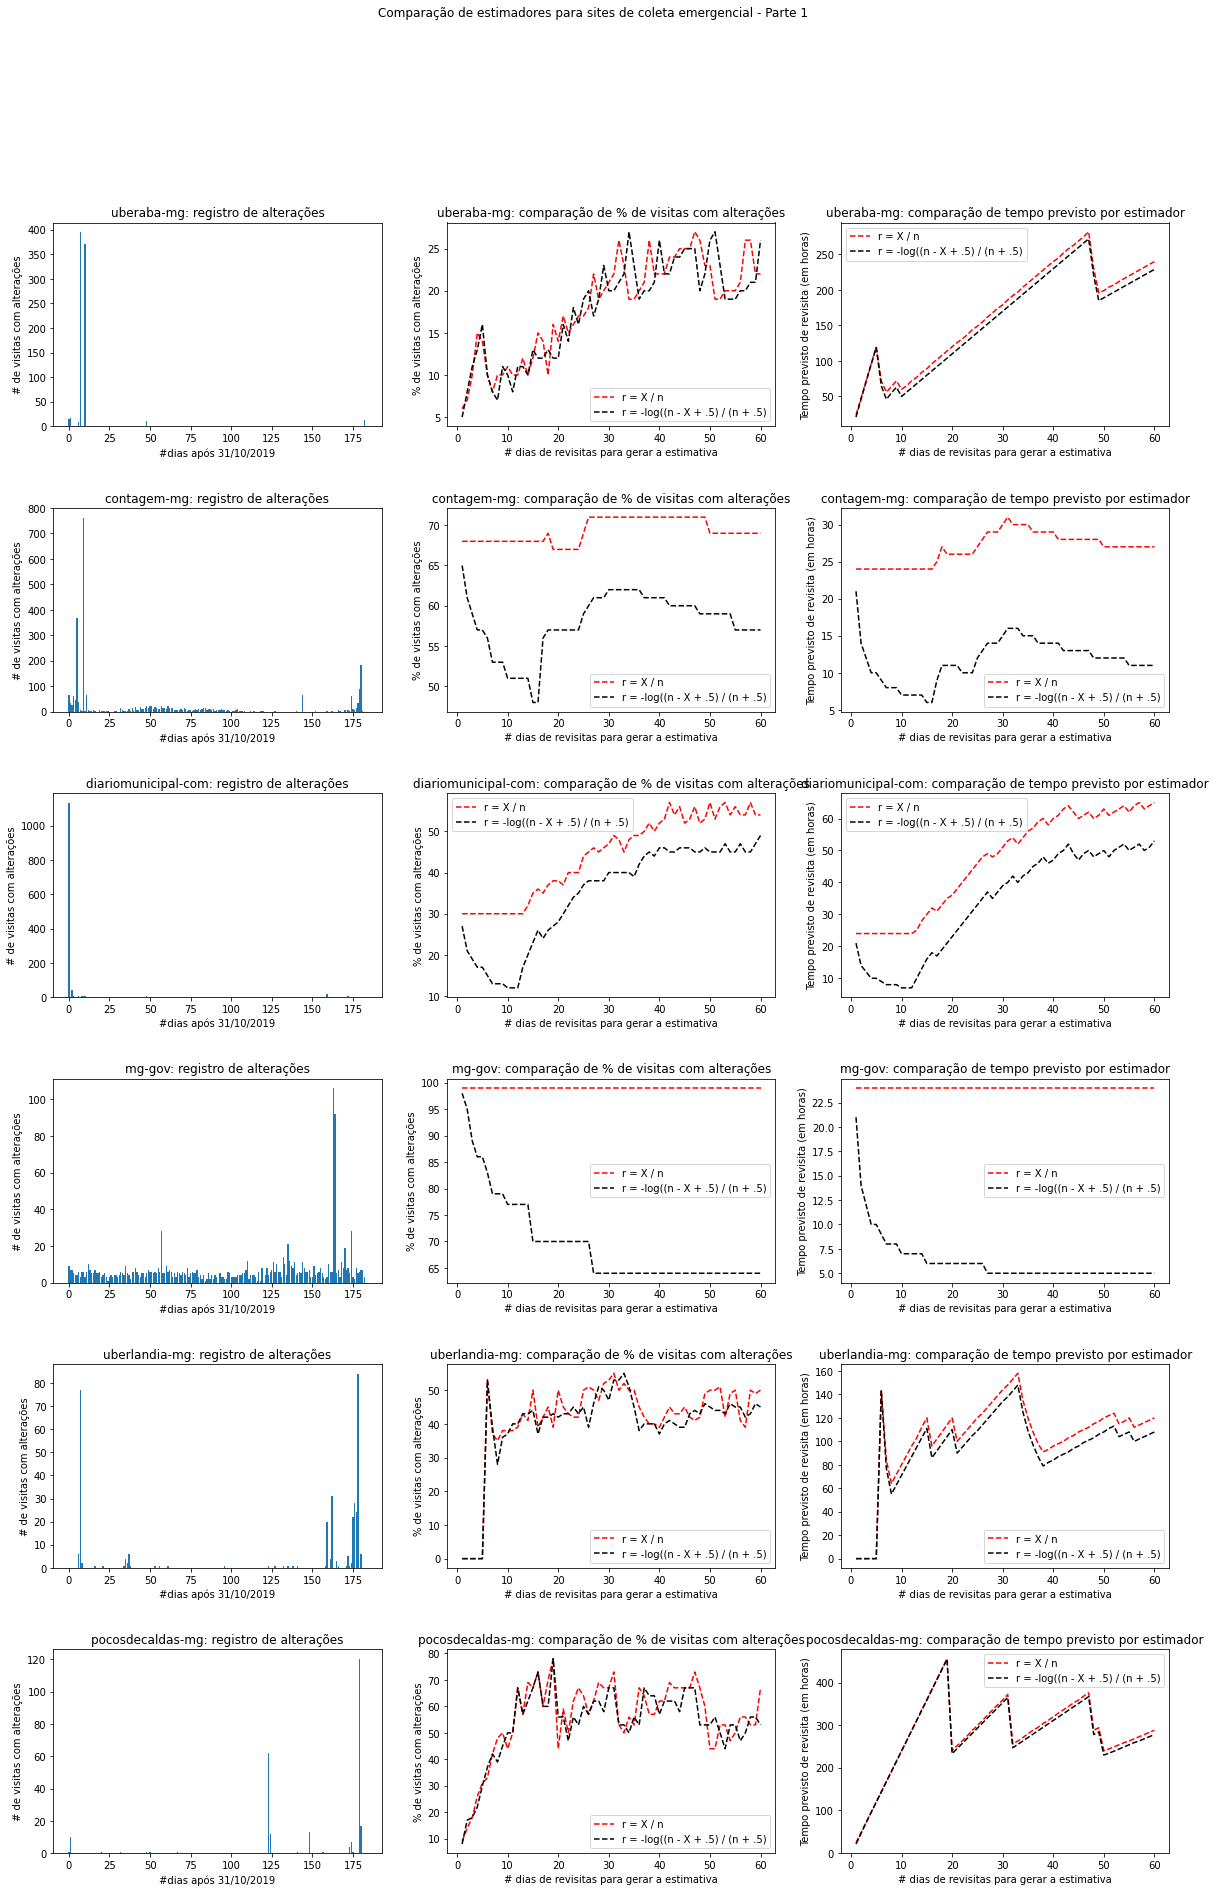

In [13]:
plot_compare(hists[:6], data[:6], 'Comparação de estimadores para sites de coleta emergencial - Parte 1', 6, 3)

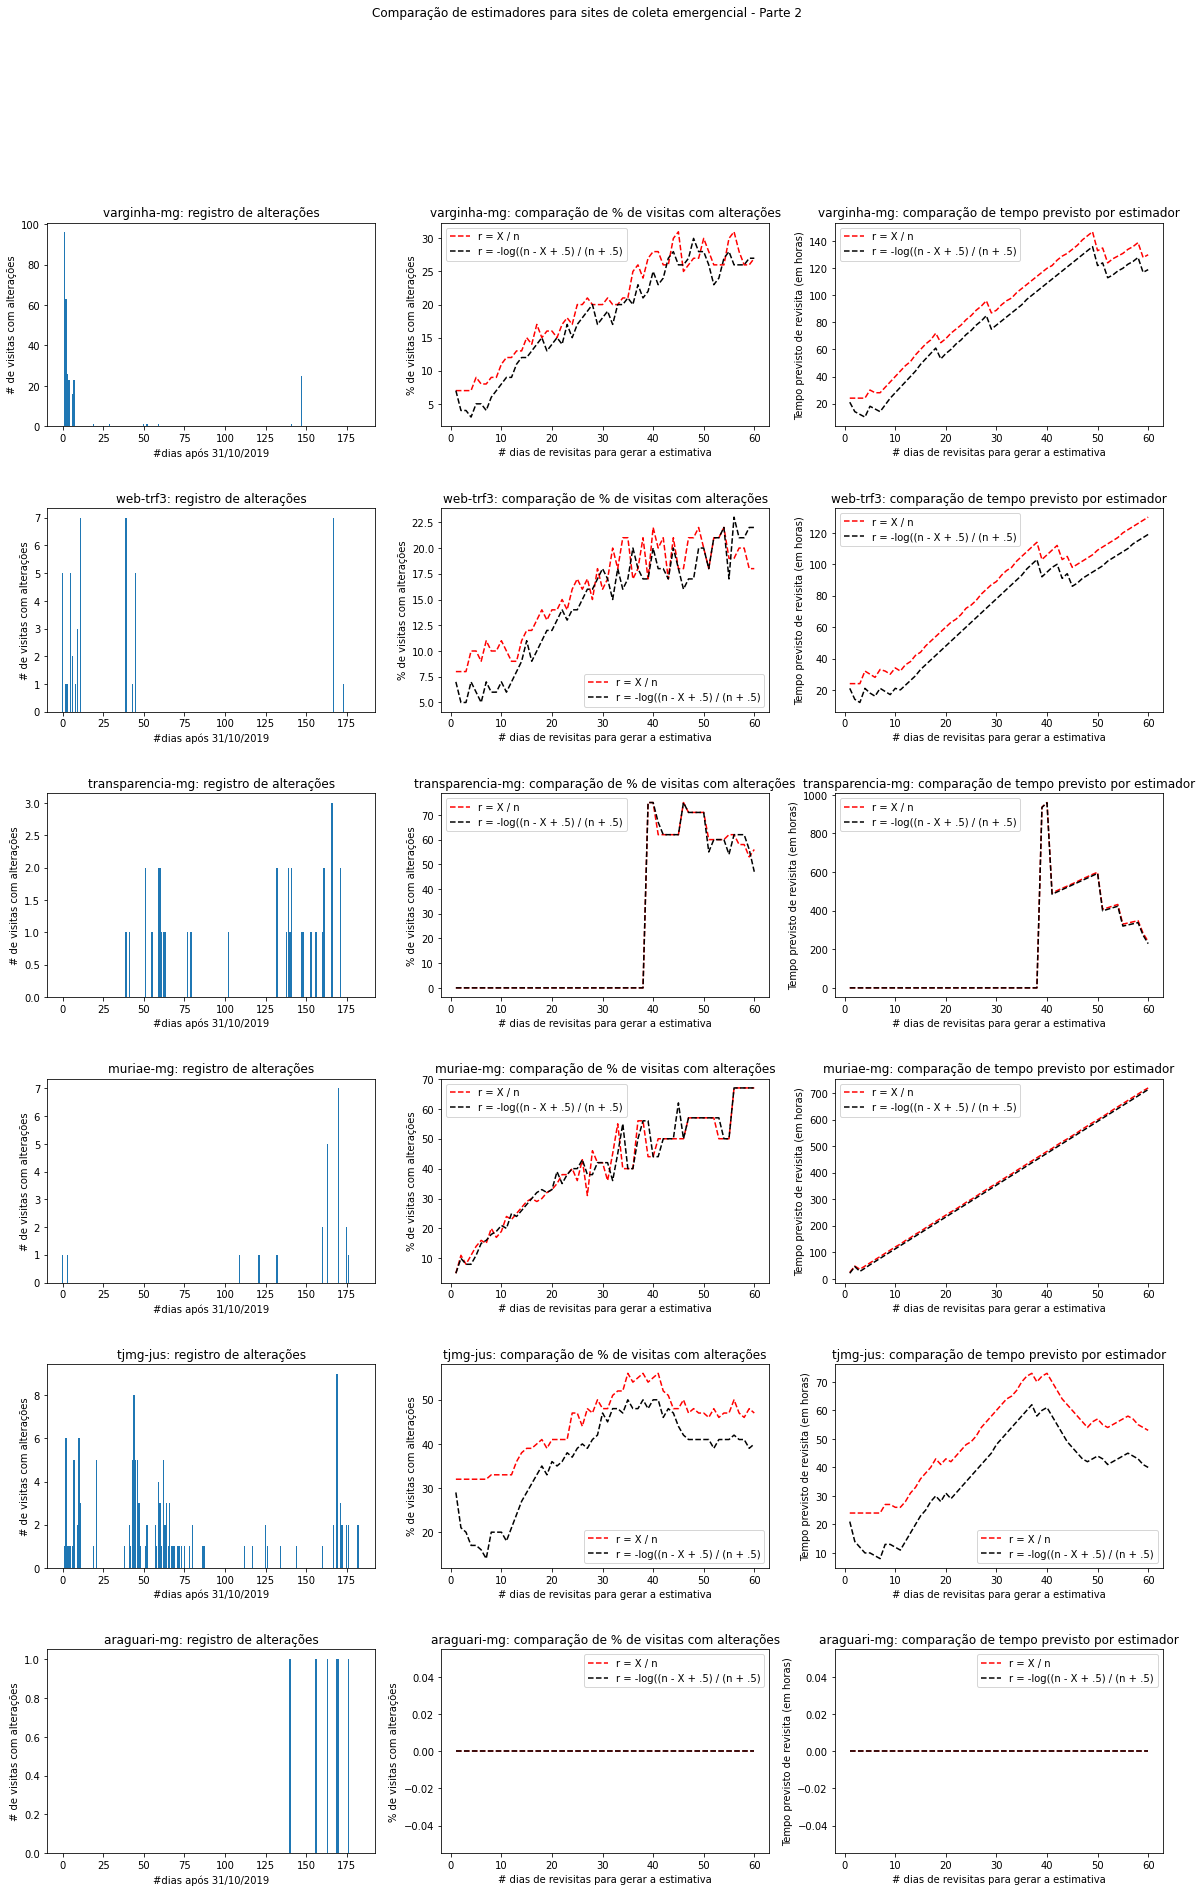

In [14]:
plot_compare(hists[6:12], data[6:12], 'Comparação de estimadores para sites de coleta emergencial - Parte 2', 6, 3)

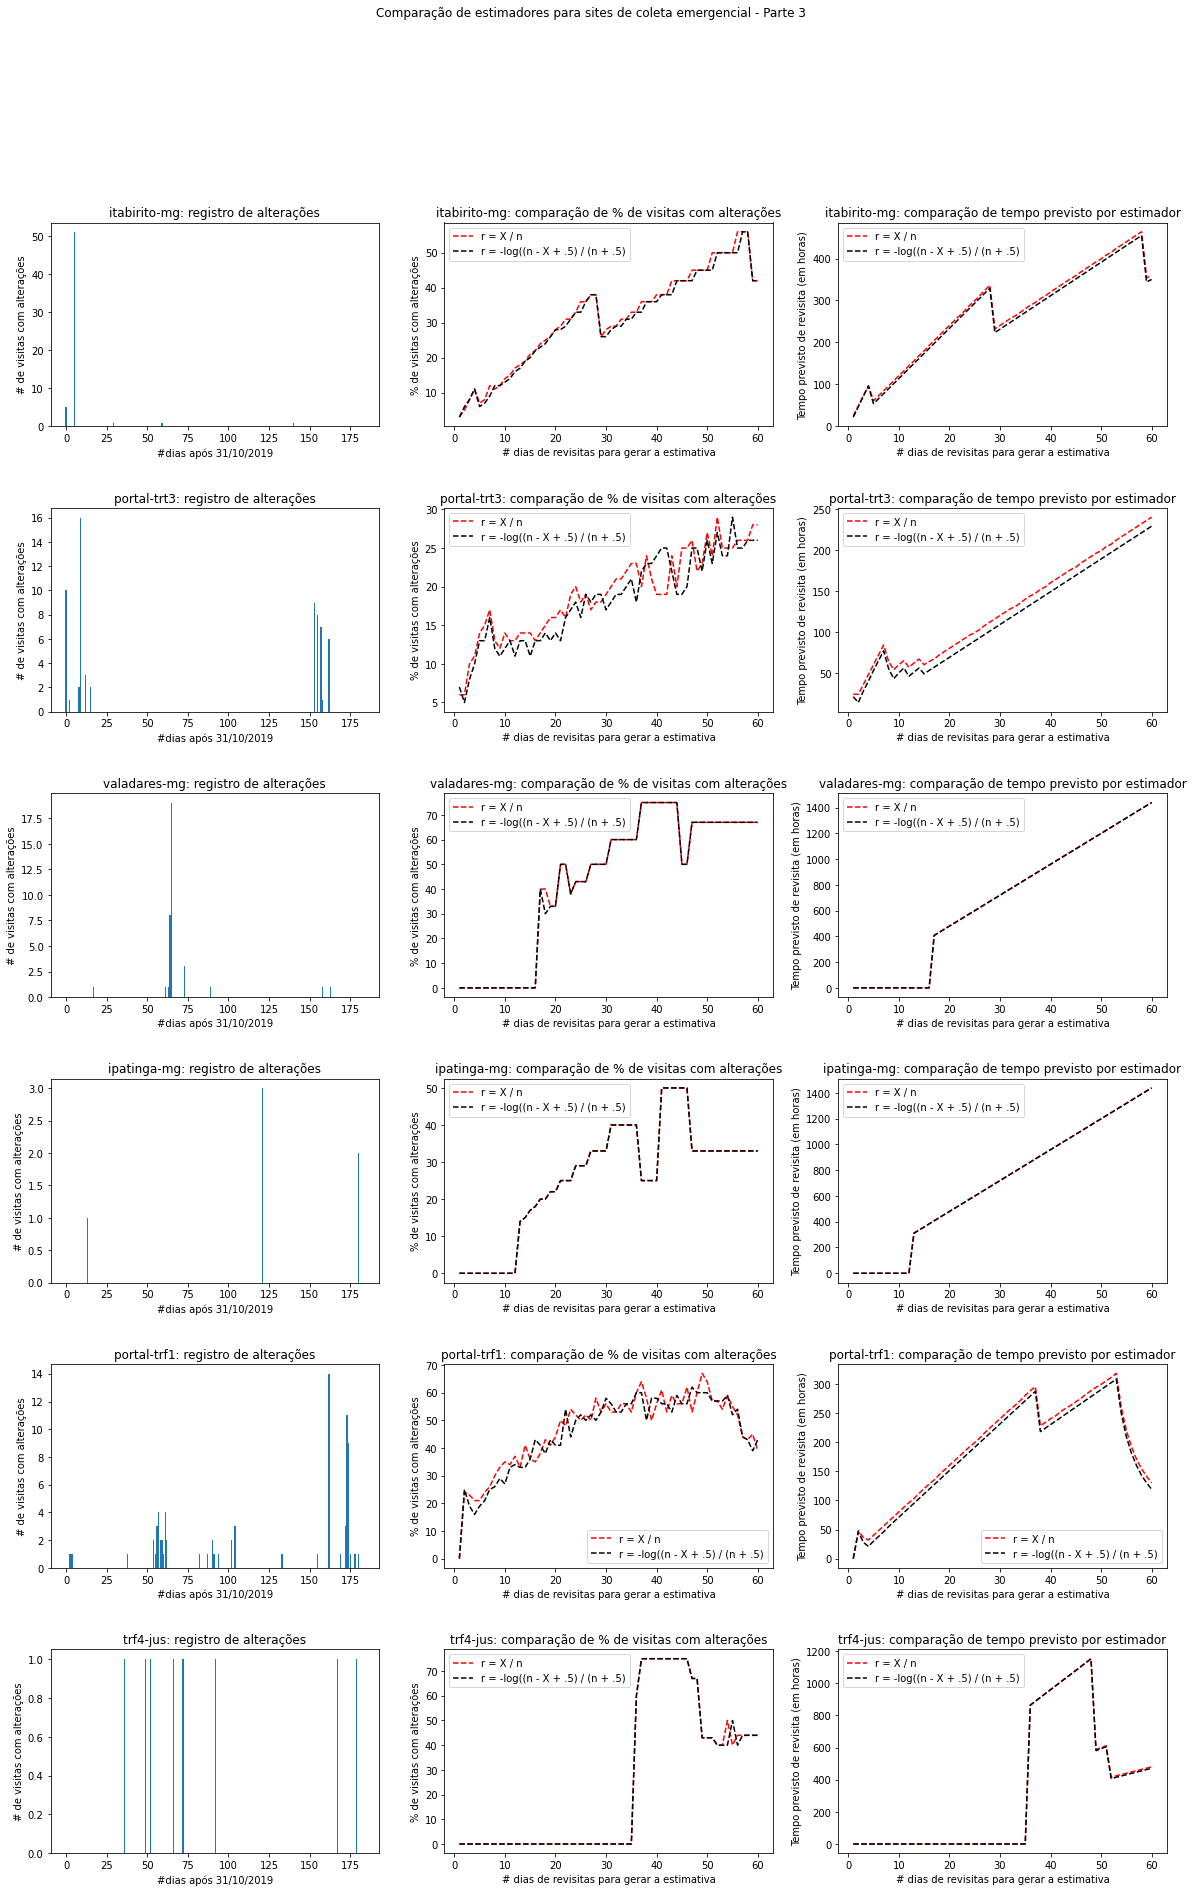

In [15]:
plot_compare(hists[12:18], data[12:18], 'Comparação de estimadores para sites de coleta emergencial - Parte 3', 6, 3)

## Desempenho médio dos estimadores para os sites de coletas emergenciais

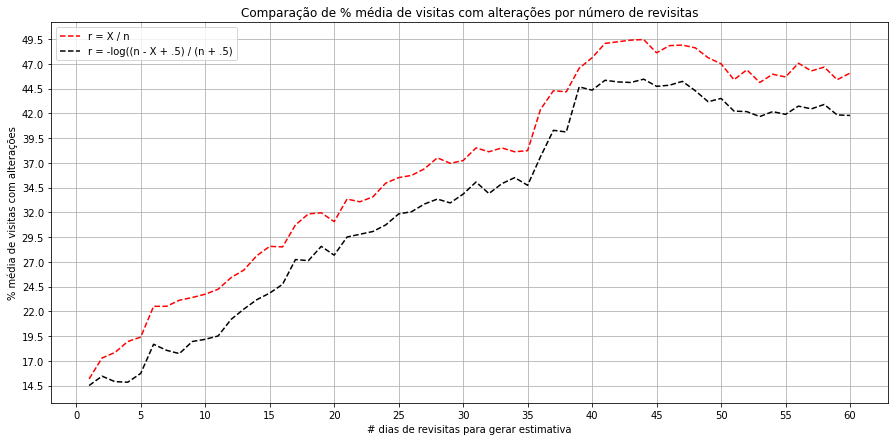

In [19]:
results = [simulator.run_experiment(domain, days, offset) for domain in domains]

xys_1 = dict([(x, list()) for x in range(1, 61)])
xys_2 = dict([(x, list()) for x in range(1, 61)])

for result in results:
    for item in result:
        xys_1[item[0]].append(item[1])  
        xys_2[item[0]].append(item[2])  

ys_1 = list() 
xs = list()
for day in xys_1:
    size = len(xys_1[day]) 
    
    xs.append(day)
    ys_1.append(sum(xys_1[day]) / size)
    
ys_2 = list()
for day in xys_2:
    size = len(xys_2[day]) 
    
    ys_2.append(sum(xys_2[day]) / size) 

fig, ax = plt.subplots(figsize=(15,7))

xticks = np.arange(0, 61, 5.0) 
yticks = np.arange(min(ys_2), max(ys_1) + 1, 2.5)

ax.plot(xs, ys_1, '--r', label='r = X / n')
ax.plot(xs, ys_2, '--k', label='r = -log((n - X + .5) / (n + .5)')
ax.set(xlabel='# dias de revisitas para gerar estimativa', ylabel='% média de visitas com alterações', xticks=xticks, yticks=yticks, title='Comparação de % média de visitas com alterações por número de revisitas')
ax.grid()
ax.legend()

plt.show()

### Discussão dos resultados

Ao contrário dos experimentos feitos com sites selecionados (sites de notícias, instituições de ensino e governamentais), os resultados para os das coletas emergenciais foram consideravelmente inferiores. A quantidade de dados disponíveis teve grande partipação nisso, uma vez que o histórico para os sites selecionados é bem mais rico. Por exemplo, com cinco dias de revisitas para eles é possível gerar uma estimativa que, em média, cerca de 68.5% das visitas possuem mudanças. Enquanto que para os sites da coleta emergencial, nesse mesmo período, apenas 19.5% das visitas feitas para a melhor estimativa possuem alguma mudanças. Ambos casos considerado o estimador de melhor resultado.

Os gráficos mostram que seria necessário mais tempo de revisitas para gerar estimativas melhores para os sites das coletas emergenciais. 

Outro ponto a se considerar é que foi considerado qualquer mudança seja qual for a seção dos sites das coletas emergenciais, pois o histórico encontrado para aquelas de maior interesse (como licitações, diários, etc) eram excassos ou nulos. Naturalmente, isso pode não representar bem frequências de mudanças para as partes que são de interesse nesses sites.